In [1]:
import numpy as np
import idx2numpy, torch
import matplotlib.pyplot as plt
import random

In [2]:
train_data = torch.as_tensor(idx2numpy.convert_from_file('mnistdata/train-images.idx3-ubyte'), dtype=torch.float32)
train_label = torch.as_tensor(idx2numpy.convert_from_file('mnistdata/train-labels.idx1-ubyte'), dtype=torch.int64)

test_data = torch.as_tensor(idx2numpy.convert_from_file('mnistdata/t10k-images.idx3-ubyte'), dtype=torch.float32)
test_label = torch.as_tensor(idx2numpy.convert_from_file('mnistdata/t10k-labels.idx1-ubyte'), dtype=torch.int64)

<ipython-input-2-dd5ef20ffd1d>:1: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  train_data = torch.as_tensor(idx2numpy.convert_from_file('mnistdata/train-images.idx3-ubyte'), dtype=torch.float32)


In [3]:
print(f"Test Image size:{test_data.shape}")
print(f"Test label: {test_label.shape}")
print(f"Train Image size:{train_data.shape}")
print(f"Train label: {train_label.shape}")

Test Image size:torch.Size([10000, 28, 28])
Test label: torch.Size([10000])
Train Image size:torch.Size([60000, 28, 28])
Train label: torch.Size([60000])


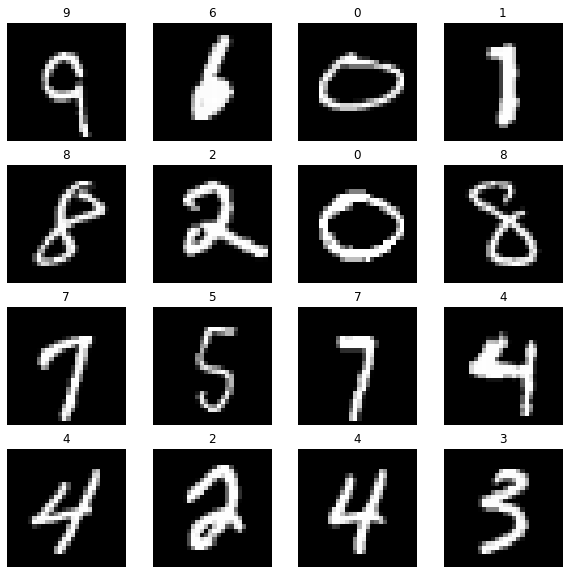

In [4]:
row, col = 4, 4
figure = plt.figure(figsize=(10,10))

for i in range(1, row*col +1):
    index = random.randint(1, len(train_data))
    image = train_data[index]
    label = train_label[index].item()
    figure.add_subplot(col, row, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')


In [5]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision

In [6]:
batch_size = 64
train_data_loader = DataLoader(train_data, batch_size= batch_size)
train_label_loader = DataLoader(train_label, batch_size= batch_size)
test_data_loader = DataLoader(test_data, batch_size= batch_size)
test_label_loader = DataLoader(test_label, batch_size= batch_size)

In [7]:
class NeuralNet(nn.Module):
    
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.forward_propogation = nn.Sequential(
            nn.Linear(28*28, 16, bias=False),
            nn.ReLU(),
            nn.Linear(16, 16, bias=False),
            nn.ReLU(),
            nn.Linear(16, 10, bias=False),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        output = self.forward_propogation(x)
        return output
        
model = NeuralNet()
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (forward_propogation): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=False)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=False)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=10, bias=False)
    (5): ReLU()
  )
)


In [8]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
def train(data_dataloader,label_dataloader , model, loss_fn, optimizer):
    size = len(data_dataloader.dataset)
    for batch, (x, y) in enumerate(zip(data_dataloader, label_dataloader)):
        pred = model(x)
        
        loss = loss_fn(pred, y)
        cat =  torch.argmax(pred, dim=1)
        accuracy = (cat == y).float().mean()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch* len(x)
            print(f"Loss: {loss:>7f}   [{current:>5d}/{size:>5d}] Accuracy: {accuracy * 100:>7f}")
            print(f"Accuracy: {accuracy:>7f}")

In [10]:
def test(data_dataloader, label_dataloader, model):
    size = len(data_dataloader.dataset)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for (x, y) in zip(data_dataloader, label_dataloader):
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"\n Test Error: \n Avg loss: {test_loss:>8f} Test Accuracy:{correct * 100}% \n")
        

In [11]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n----------------------")
    train(train_data_loader, train_label_loader, model, loss_fn, optimizer)
    test(test_data_loader,  test_label_loader, model)

Epoch 1
----------------------
Loss: 4.408142   [    0/60000] Accuracy: 12.500000
Accuracy: 0.125000
Loss: 1.385404   [ 6400/60000] Accuracy: 56.250000
Accuracy: 0.562500
Loss: 1.076885   [12800/60000] Accuracy: 62.500000
Accuracy: 0.625000
Loss: 1.140142   [19200/60000] Accuracy: 59.375000
Accuracy: 0.593750
Loss: 0.846896   [25600/60000] Accuracy: 71.875000
Accuracy: 0.718750
Loss: 0.679810   [32000/60000] Accuracy: 78.125000
Accuracy: 0.781250
Loss: 0.488464   [38400/60000] Accuracy: 85.937500
Accuracy: 0.859375
Loss: 0.579758   [44800/60000] Accuracy: 87.500000
Accuracy: 0.875000
Loss: 0.953730   [51200/60000] Accuracy: 65.625000
Accuracy: 0.656250
Loss: 0.681960   [57600/60000] Accuracy: 79.687500
Accuracy: 0.796875

 Test Error: 
 Avg loss: 0.010598 Test Accuracy:78.58000000000001% 

Epoch 2
----------------------
Loss: 0.680525   [    0/60000] Accuracy: 78.125000
Accuracy: 0.781250
Loss: 0.699080   [ 6400/60000] Accuracy: 76.562500
Accuracy: 0.765625
Loss: 0.415031   [12800/6000

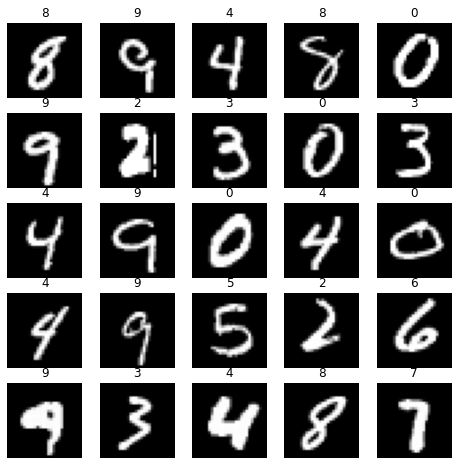

In [12]:
model.eval()
row , col = 5, 5
figure = plt.figure(figsize=(8,8))
for i in range(1, row*col+1):
    index = random.randint(1, len(test_data))
    x, y = test_data[index], test_label[index]
    x = torch.as_tensor(x.reshape(1, 28, 28), dtype=torch.float32)
    with torch.no_grad():
        pred = model(x)
        x = x.reshape(28, 28)
        predicted_num = pred[0].argmax(0).item()
        figure.add_subplot(row, col, i)
        plt.title(predicted_num)
        plt.axis('off')
        plt.imshow(x, cmap='gray')
        

## Implementation without using pytorch

In [13]:
train_data = train_data.detach().numpy() / 255
train_label = train_label.detach().numpy() 
test_data = test_data.detach().numpy() / 255
test_label = test_label.detach().numpy()

In [15]:
def convert_array(*labels):
    out = []
    for label in labels:
        label = label.tolist()
        for i , val in enumerate(label):
            label_list = np.zeros(10, dtype=int)
            label_list[val] = 1
            label[i] = label_list
        label = np.array(label, dtype=object)
        out.append(label)
    return out
                
test_label, train_label =  convert_array(test_label, train_label)

training_data = (train_data, train_label)
testing_data = (test_data, test_label)

[0 1 0 0 0 0 0 0 0 0]
1


In [17]:
class Network:
    def __init__(self, layer):
        self.num_layer = len(layer)
        self.layer = layer
        self.weights = [np.random.rand(self.layer[i], self.layer[i+1]) for i in range(self.num_layer-1)]
    
    def feedforward(self, a):
        for w in self.weights:
            a = sigmoid(np.dot(a, w))
        return a
        
    def backprop(self, x, y):
        pass
        

In [18]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return (sigmoid(z) * (1-sigmoid(z)))